Citation: The data used in this exercise was originally collected by **Forina, M. et al.**

PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

**It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](https://archive.ics.uci.edu/). Irvine, CA: University of California, School of Information and Computer Science).**

# **Classification**

* **Wine Dataset**

12 numeric features

3 labels (1, 2, 3)

In [43]:
import pandas as pd

# Reading data
data = pd.read_csv('wine.data', names = ['class', 'alcohol','malicacid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', '0D280_0D315_of_diluted_wines', 'proline' ])
data.sample(10)

,class,alcohol,malicacid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,0D280_0D315_of_diluted_wines,proline
100,2,12.08,2.08,1.70,17.5,97,2.23,2.17,0.26,1.40,3.30,1.27,2.96,710
147,3,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
165,3,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.62,0.78,1.75,520
11,1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
17,1,13.83,1.57,2.62,20.0,115,2.95,3.40,0.40,1.72,6.60,1.13,2.57,1130
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
130,3,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [44]:
# Separate Features and labels

features = ['alcohol','malicacid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', '0D280_0D315_of_diluted_wines', 'proline']

label = 'class'
# to facilitate things later on replace labels form 1, 2 ,3 with 0,1,2
print(data['class'][:5])
data['class'] = data['class']-1
print(data['class'][:5])

X,y =  data[features].values, data[label].values



0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64
0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64


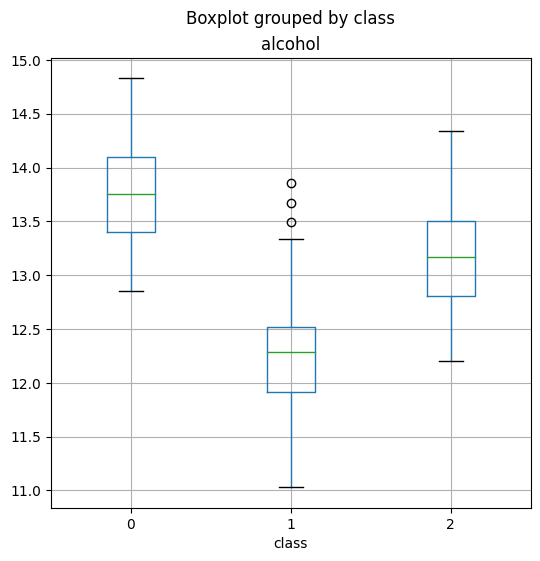

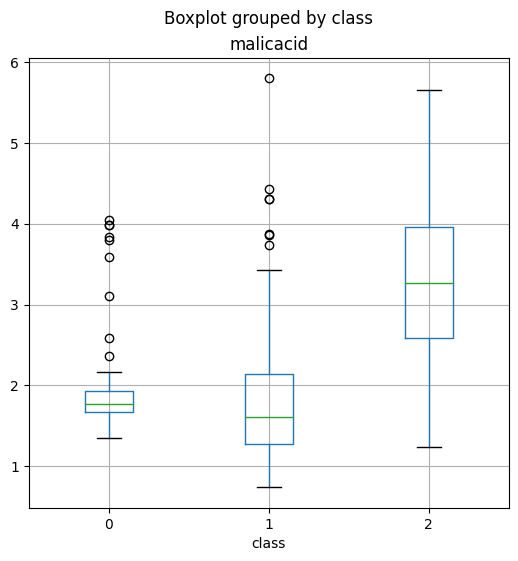

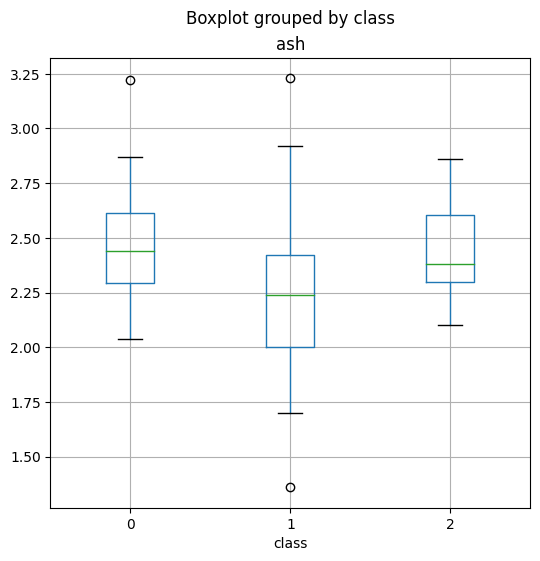

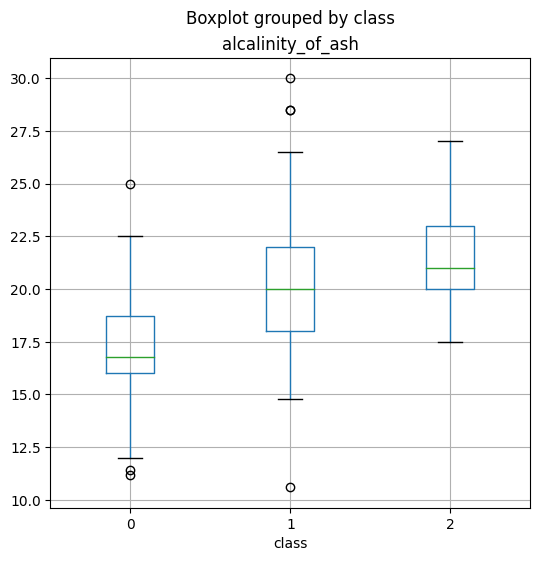

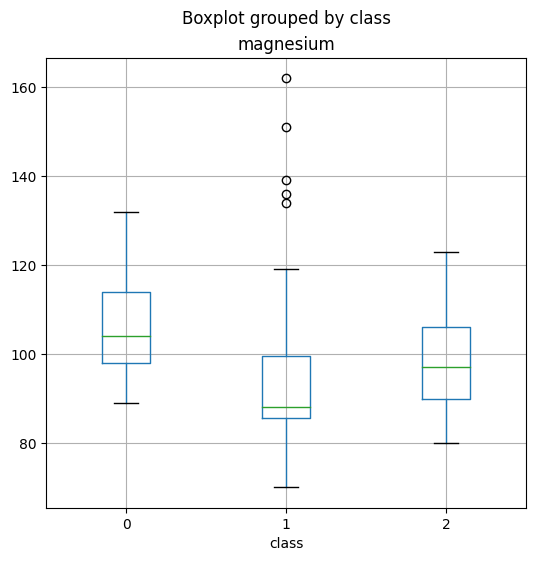

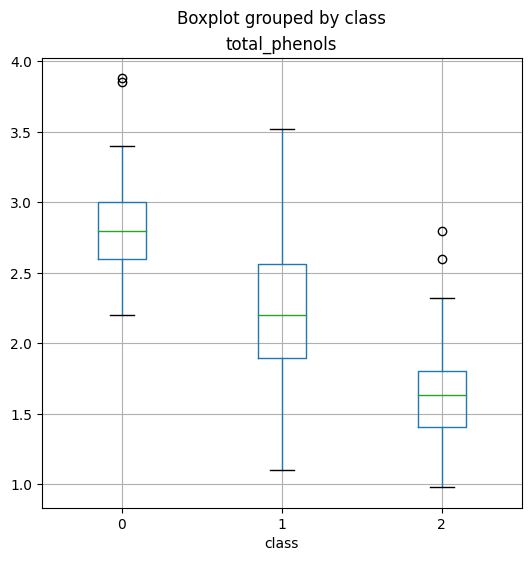

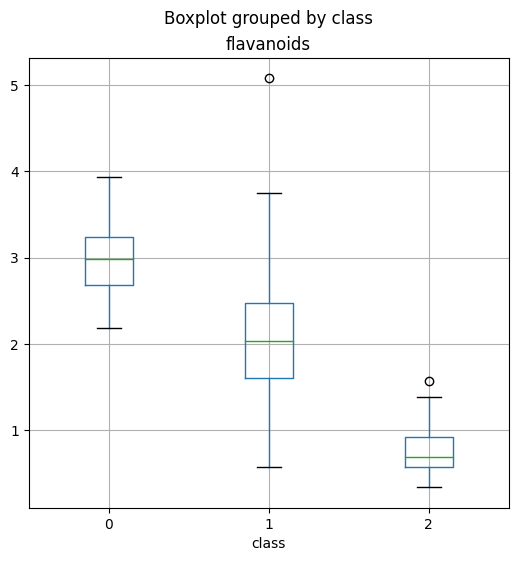

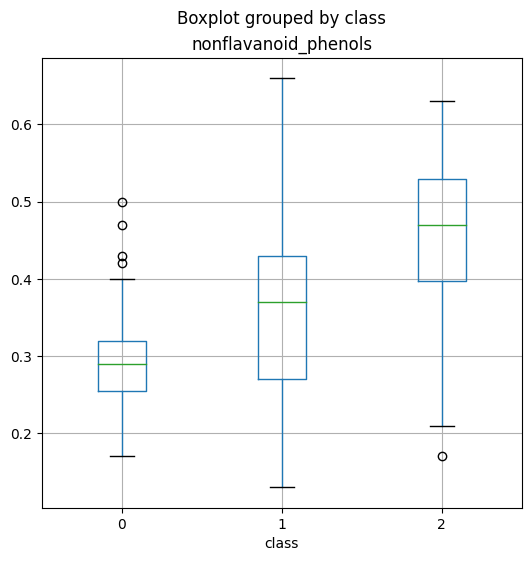

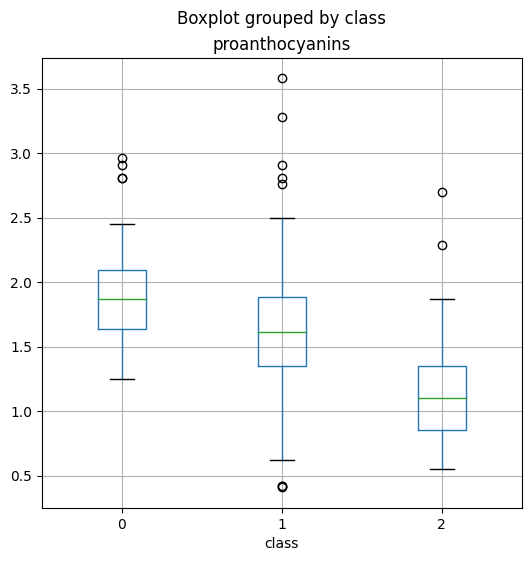

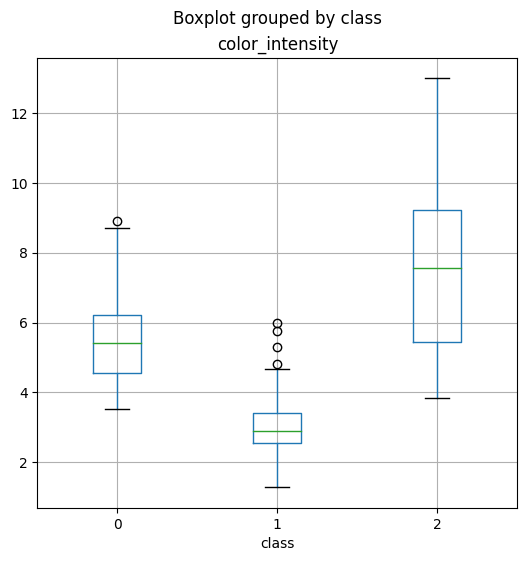

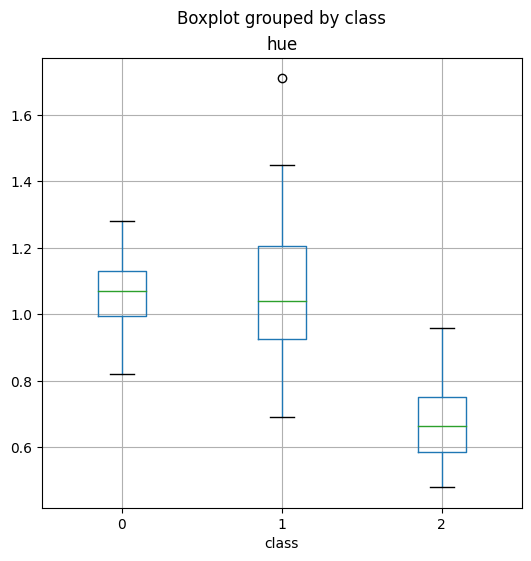

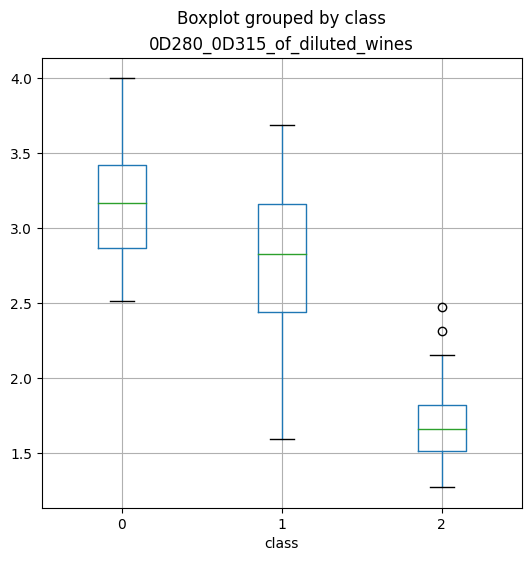

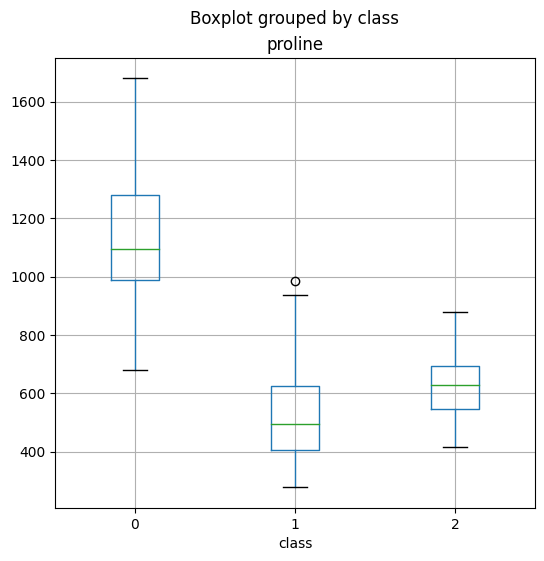

In [45]:
# check the features distributions

from matplotlib import pyplot as plt
%matplotlib inline

for col in features:
    data.boxplot(column=col, by=label, figsize=(6,6))
    plt.title(col)
plt.show()

In [46]:
# some features are clearly class dependent such as phenols (both flavanoids and non-flavanoids)
# confirma that there is no missing data and the distribution of classes

print('Missinng values in the dataset:', data.isnull().sum())
print('Here is the number of records per wine class/label:', data['class'].value_counts())

Missinng values in the dataset: class                           0
alcohol                         0
malicacid                       0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
0D280_0D315_of_diluted_wines    0
proline                         0
dtype: int64
Here is the number of records per wine class/label: 1    71
0    59
2    48
Name: class, dtype: int64


In [47]:
# no missing data and data is not skewed

from sklearn.model_selection import train_test_split

#spliting the data into training/testing (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 124
Test cases: 54


In [48]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 13), (54, 13), (124,), (54,))

In [49]:
X_train[:10]

array([[1.371e+01, 1.860e+00, 2.360e+00, 1.660e+01, 1.010e+02, 2.610e+00,
        2.880e+00, 2.700e-01, 1.690e+00, 3.800e+00, 1.110e+00, 4.000e+00,
        1.035e+03],
       [1.222e+01, 1.290e+00, 1.940e+00, 1.900e+01, 9.200e+01, 2.360e+00,
        2.040e+00, 3.900e-01, 2.080e+00, 2.700e+00, 8.600e-01, 3.020e+00,
        3.120e+02],
       [1.327e+01, 4.280e+00, 2.260e+00, 2.000e+01, 1.200e+02, 1.590e+00,
        6.900e-01, 4.300e-01, 1.350e+00, 1.020e+01, 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.316e+01, 3.570e+00, 2.150e+00, 2.100e+01, 1.020e+02, 1.500e+00,
        5.500e-01, 4.300e-01, 1.300e+00, 4.000e+00, 6.000e-01, 1.680e+00,
        8.300e+02],
       [1.386e+01, 1.510e+00, 2.670e+00, 2.500e+01, 8.600e+01, 2.950e+00,
        2.860e+00, 2.100e-01, 1.870e+00, 3.380e+00, 1.360e+00, 3.160e+00,
        4.100e+02],
       [1.285e+01, 3.270e+00, 2.580e+00, 2.200e+01, 1.060e+02, 1.650e+00,
        6.000e-01, 6.000e-01, 9.600e-01, 5.580e+00, 8.700e-01, 2.110e+00,
        5.70

In [50]:
# scaling the numerical features and training the model (logistic regression)

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Define preprocessing for numeric columns (scale them)
feature_columns = [0,1,2,3,4,5,6, 7,8, 9, 10, 11, 12]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
    ])

# Create preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('preprocess', feature_transformer, feature_columns)])

# Create training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 10000))])

from sklearn.linear_model import LogisticRegression



# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, y_train)
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12])])),
                ('regressor', LogisticRegression(max_iter=10000))])


In [51]:
#check the mtrics on the training dataset

from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np


# Get predictions from test data
predictions = model.predict(X_train)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_train, predictions))
print("Overall Precision:",precision_score(y_train, predictions, average='macro'))
print("Overall Recall:",recall_score(y_train, predictions, average='macro'))

Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


Overall Accuracy: 1.0
Overall Precision: 1.0
Overall Recall: 1.0


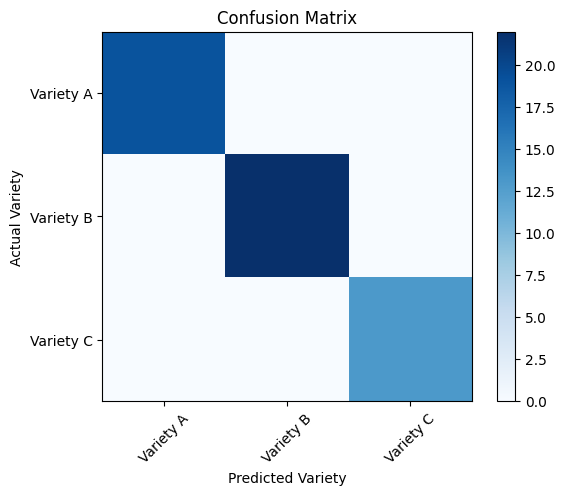

In [52]:
# Evaluate the model
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np


# Get predictions from test data
predictions = model.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

In [53]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



Average AUC: 1.0


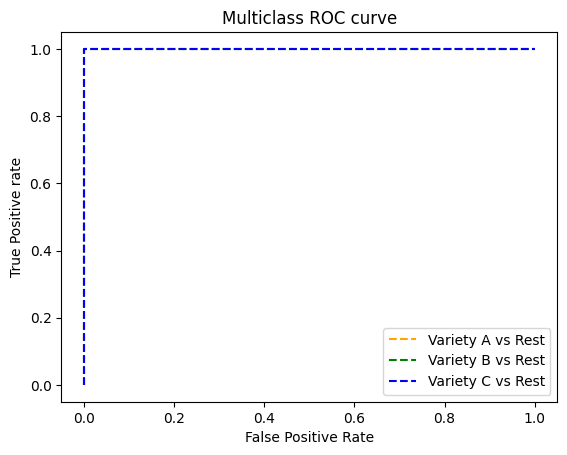

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get class probability scores
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


In [55]:
y_test

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2])

In [56]:
predictions


array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2])

In [57]:
# all metrics are very high

# predic on two new observations
x_new = np.array([[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
                  [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]])

import joblib

# Save the model as a pickle file
filename = './wine_classifer.pkl'
joblib.dump(model, filename)

# Load the saved model
model = joblib.load(filename)

# Call the web service, passing the input data
predictions = model.predict(x_new)

# Get the predicted classes.
for prediction in predictions:
    print(prediction, '(' + classes[prediction] +')')

0 (Variety A)
1 (Variety B)
